# Cobaya (Part I)
## Subhajit Ghosh
## Cobaya Authors: Jesus Torrado and Antony Lewis
### Source: https://cobaya.readthedocs.io/en/latest/


#### This notebook is for running Cobaya. Cobaya is an MCMC sampler primarily used for cosmological analysis. Source: https://cobaya.readthedocs.io/en/latest/example.html

The input of cobaya consists of a text file that usually looks like this:

A likelihood block, listing the likelihood pdf’s to be explored, here a Gaussian with the mean and covariance stated.

A params block, stating the parameters that are going to be explored (or derived), their prior, the Latex label that will be used in the plots, the reference (ref) starting point for the chains (optional), and the initial spread of the MCMC covariance matrix proposal.

A sampler block stating that we will use the mcmc sampler to explore the prior+likelihood described above, stating the maximum number of samples used, how many initial samples to ignore, and that we will sequentially refine our initial guess for a covariance matrix.

An output prefix, indicating where the products will be written and a prefix for their name.

To run this example, save the text above in a file called gaussian.yaml in a folder of your choice, and do

Below we will run the example in the Jupyter Notebook

In [1]:
from cobaya.run import run
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
from cobaya import load_samples
from cobaya.samplers.mcmc import plot_progress
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

In [2]:
info = yaml_load_file("gaussian.yaml")
info

{'likelihood': {'gaussian_mixture': {'means': [0.2, 0],
   'covs': [[0.1, 0.05], [0.05, 0.2]],
   'derived': True}},
 'params': {'a': {'prior': {'min': -0.5, 'max': 3}, 'latex': '\\alpha'},
  'b': {'prior': {'dist': 'norm', 'loc': 0, 'scale': 1},
   'ref': 0,
   'proposal': 0.5,
   'latex': '\\beta'},
  'derived_a': {'latex': '\\alpha^\\prime'},
  'derived_b': {'latex': '\\beta^\\prime'}},
 'sampler': {'mcmc': None},
 'output': 'chains/gaussian'}

In [3]:
updated_info, sampler = run(info)
# updated_info, sampler = run(info, resume = True) if you ran the cobaya-run command from the shell.

[output] Output to be read-from/written-into folder 'chains', with prefix 'gaussian'
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[mcmc] Initial point: a:0.9857203, b:0
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 19000.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-05-08 18:46:18 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.175
[mcmc]  - Convergence of means: R-1 = 0.349123 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.

In [4]:
updated_info

{'sampler': {'mcmc': {'burn_in': 0,
   'max_tries': '40d',
   'covmat': None,
   'covmat_params': None,
   'proposal_scale': 2.4,
   'output_every': '60s',
   'learn_every': '40d',
   'temperature': 1,
   'learn_proposal': True,
   'learn_proposal_Rminus1_max': 2.0,
   'learn_proposal_Rminus1_max_early': 30.0,
   'learn_proposal_Rminus1_min': 0.0,
   'max_samples': inf,
   'Rminus1_stop': 0.01,
   'Rminus1_cl_stop': 0.2,
   'Rminus1_cl_level': 0.95,
   'Rminus1_single_split': 4,
   'measure_speeds': True,
   'oversample_power': 0.4,
   'oversample_thin': True,
   'drag': False,
   'blocking': [(1, ['a', 'b'])],
   'callback_function': None,
   'callback_every': None,
   'seed': None,
   'check_every': None,
   'oversample': None,
   'drag_limits': None,
   'fallback_covmat_scale': 4,
   'version': '3.5'}},
 'likelihood': {'gaussian_mixture': {'means': [0.2, 0],
   'covs': [[0.1, 0.05], [0.05, 0.2]],
   'weights': None,
   'input_params_prefix': '',
   'output_params_prefix': '',
   'de

In [5]:
sampler.products()

{'sample':       weight  minuslogpost         a         b  derived_a  derived_b  \
 0       10.0      2.121678  0.343660 -0.032593   0.454292  -0.249619   
 1       18.0      2.014305  0.266594  0.066376   0.210590   0.079073   
 2        9.0      2.009055  0.250211  0.074223   0.158781   0.117414   
 3       10.0      2.070030  0.198642  0.156867  -0.004295   0.376606   
 4       13.0      2.740558 -0.162457  0.002912  -1.146188   0.440179   
 ...      ...           ...       ...       ...        ...        ...   
 1115     6.0      2.491533  0.013960 -0.391737  -0.588310  -0.714071   
 1116     8.0      2.580394 -0.140891 -0.152748  -1.077991   0.042305   
 1117     3.0      2.946148 -0.188296 -0.402778  -1.227901  -0.498720   
 1118     4.0      2.125044  0.054434 -0.156540  -0.460319  -0.200218   
 1119     5.0      2.057845  0.284733 -0.065143   0.267949  -0.256997   
 
       minuslogprior  minuslogprior__0      chi2  chi2__gaussian_mixture  
 0          2.172233          2.17223

In [6]:
# Export the results to GetDist
gd_sample = sampler.products(to_getdist=True,skip_samples=0.3)["sample"]

[root] *WARNING* outlier fraction 0.11224489795918367 


In [7]:
# Analyze and plot
mean = gd_sample.getMeans()[:2]
covmat = gd_sample.getCovMat().matrix[:2, :2]
print("Mean:")
print(mean)
print("Covariance matrix:")
print(covmat)

Mean:
[ 0.20220213 -0.01650718]
Covariance matrix:
[[0.08771607 0.03380793]
 [0.03380793 0.1604967 ]]


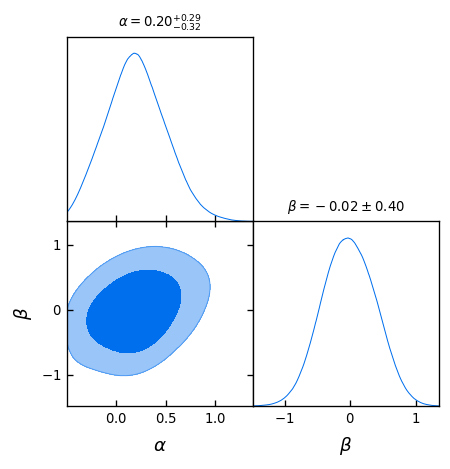

In [8]:
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True, title_limit = True)

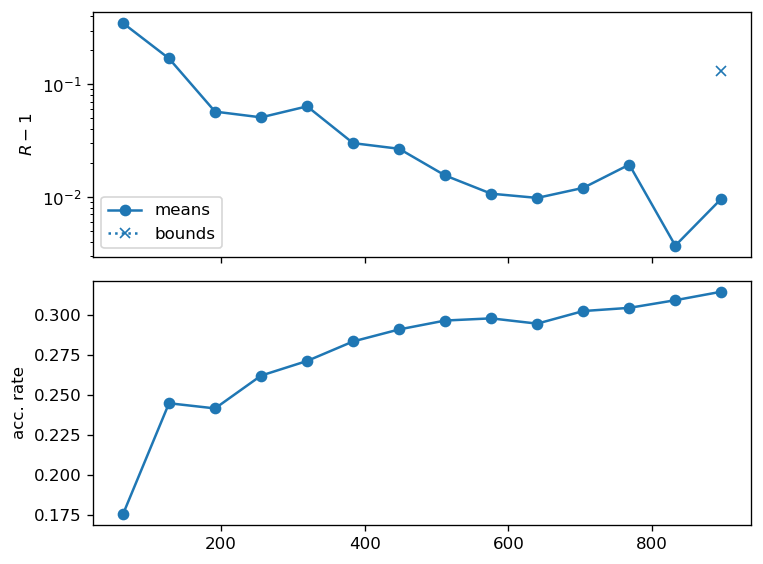

In [9]:
plot_progress(info["output"])
plt.tight_layout()
plt.show()

<font color='red'>Warmup:</font> Sample the following \chi^2 distribution with 3 variables (x,y,z). The measured values and errors are,  

x_m = 2, y_m = -1, z_m = 1

x_err = 0.1, y_err = 0.5, z_error = 0.01 


In [10]:
info_ex = {'likelihood': {'gaussian_mixture': {'means': [2, -1,1],

'covs': [[0.1**2, 0, 0], [0, 0.5**2, 0], [0,0,0.05**2]],'derived' : False}},

'params': {

'x': {'prior': {'min': 0, 'max': 4}, 'latex': 'x'},

'y': {'prior': {'min': -8, 'max': 8},'latex': 'y'},

'z': {'prior': {'min': 0.5, 'max': 1.5},'latex': 'z'}},
  
'sampler': {'mcmc': None},
 
 'output': 'chains/exer'}

In [11]:
updated_info_ex, sampler_ex = run(info_ex, force = True)

[output] Output to be read-from/written-into folder 'chains', with prefix 'exer'
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[mcmc] Initial point: x:1.779772, y:5.591093, z:1.349068
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 24800.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2024-05-08 18:46:19 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 120 samples accepted.
[mcmc]  - Acceptance rate: 0.057
[mcmc]  - Convergence of means: R-1 = 0.259854 after 96 accepted steps
[mcmc]  - Updated covariance matrix o

In [12]:
gd_sample_ex = sampler_ex.products(to_getdist=True,skip_samples=0.3)["sample"]

[root] *WARNING* outlier fraction 0.008095238095238095 


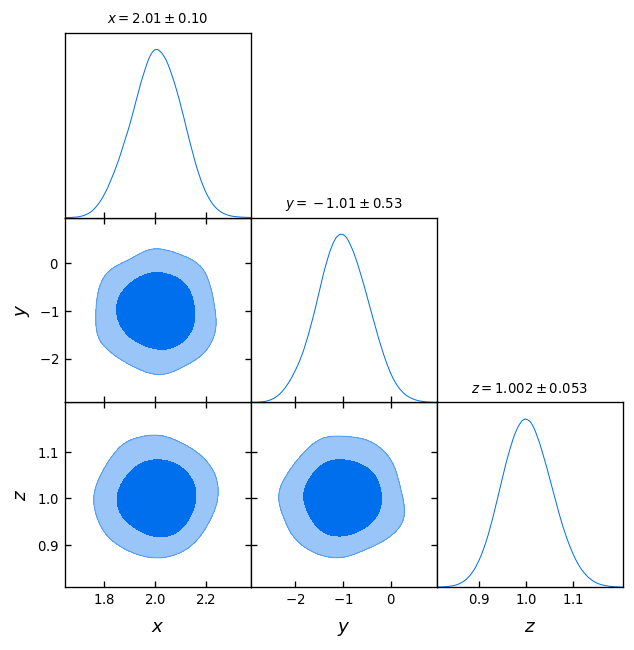

In [13]:
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample_ex, ["x", "y", "z"], filled=True, title_limit = True)

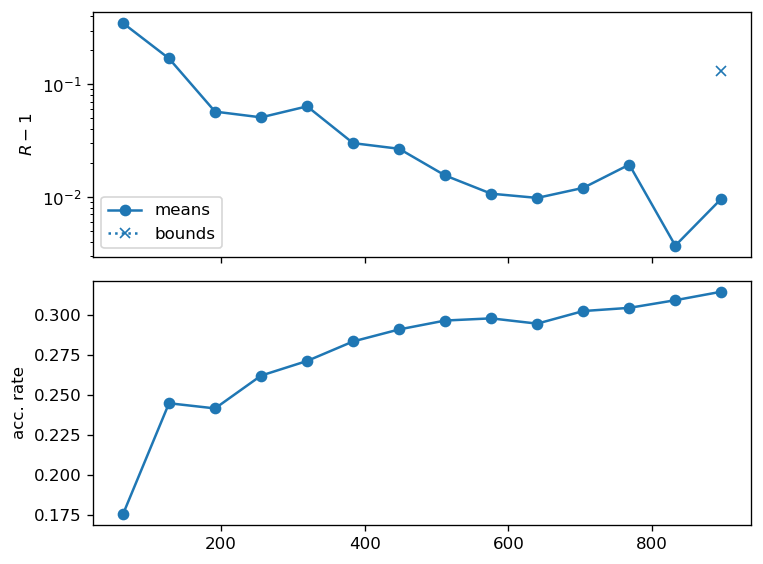

In [14]:
plot_progress(info["output"])
plt.tight_layout()
plt.show()